In [36]:
# Modify the Python path to include the src directory
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from datetime import datetime

# Import custom modules
from utils.utils import load_data, save_data
from data.data_preprocessing import DataPreprocessing

In [37]:
# Load the datasets
fraud_data = load_data('../data/raw/fraud_data_with_country.csv')
credit_card_data = load_data('../data/raw/creditcard.csv')
ip_address_data = load_data('../data/raw/IpAddress_to_Country.csv')

In [38]:
# Check for missing values before handling them
print("Missing values in fraud_data before handling:")
print(fraud_data.isnull().sum())

Missing values in fraud_data before handling:
user_id           0
signup_time       0
purchase_time     0
purchase_value    0
device_id         0
source            0
browser           0
sex               0
age               0
ip_address        0
class             0
ip_address_int    0
country           0
dtype: int64


In [39]:
print("Missing values in credit_card_data before handling:")
print(credit_card_data.isnull().sum())

Missing values in credit_card_data before handling:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [40]:
print("Missing values in ip_address_data before handling:")
print(ip_address_data.isnull().sum())

Missing values in ip_address_data before handling:
lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64


In [41]:
# Instantiate the DataPreprocessing class
dp_fraud = DataPreprocessing(fraud_data)
dp_credit = DataPreprocessing(credit_card_data)
dp_ip = DataPreprocessing(ip_address_data)

In [42]:
# Handle missing values
dp_fraud.handle_missing_values(method='drop')

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_address_int,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,732758368,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,350311387,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,2621473820,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,3840542443,Unknown
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,415583117,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1,3451154526,United States
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0,2439047221,Netherlands
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0,2748470523,Japan
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0,3601174708,United States


In [43]:
dp_credit.handle_missing_values(method='fill', fill_value=dp_credit.data.mean())

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [44]:
dp_ip.handle_missing_values(method='drop')  # or method='fill' with appropriate fill_value

,lower_bound_ip_address,upper_bound_ip_address,country
0,1.677722e+07,16777471,Australia
1,1.677747e+07,16777727,China
2,1.677773e+07,16778239,China
3,1.677824e+07,16779263,Australia
4,1.677926e+07,16781311,China
...,...,...,...
138841,3.758092e+09,3758093311,Hong Kong
138842,3.758093e+09,3758094335,India
138843,3.758095e+09,3758095871,China
138844,3.758096e+09,3758096127,Singapore


In [45]:
# Remove duplicates
dp_fraud.remove_duplicates()

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_address_int,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0,732758368,Japan
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0,350311387,United States
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1,2621473820,United States
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0,3840542443,Unknown
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0,415583117,United States
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1,3451154526,United States
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0,2439047221,Netherlands
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0,2748470523,Japan
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0,3601174708,United States


In [46]:
dp_credit.remove_duplicates()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [47]:
dp_ip.remove_duplicates()

,lower_bound_ip_address,upper_bound_ip_address,country
0,1.677722e+07,16777471,Australia
1,1.677747e+07,16777727,China
2,1.677773e+07,16778239,China
3,1.677824e+07,16779263,Australia
4,1.677926e+07,16781311,China
...,...,...,...
138841,3.758092e+09,3758093311,Hong Kong
138842,3.758093e+09,3758094335,India
138843,3.758095e+09,3758095871,China
138844,3.758096e+09,3758096127,Singapore


In [48]:
# Correct data types
dp_fraud.correct_data_types()
# Assuming ip_address_data does not need datetime conversion
# Check data types before saving processed data
print("\nData types in fraud_data before saving processed data:")
print(dp_fraud.data.dtypes)


Data types in fraud_data before saving processed data:
user_id                    int64
signup_time       datetime64[ns]
purchase_time     datetime64[ns]
purchase_value             int64
device_id                 object
source                    object
browser                   object
sex                       object
age                        int64
ip_address               float64
class                      int64
ip_address_int             int64
country                   object
dtype: object


In [49]:
print("\nData types in credit_card_data before saving processed data:")
print(dp_credit.data.dtypes)


Data types in credit_card_data before saving processed data:
Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object


In [50]:
print("\nData types in ip_address_data before saving processed data:")
print(dp_ip.data.dtypes)


Data types in ip_address_data before saving processed data:
lower_bound_ip_address    float64
upper_bound_ip_address      int64
country                    object
dtype: object


In [55]:
print(categorical_columns_fraud)

Index(['device_id', 'source', 'browser', 'sex', 'country'], dtype='object')


In [56]:
print(categorical_columns_credit)

Index([], dtype='object')


In [57]:
print(categorical_columns_ip)

Index(['country'], dtype='object')


In [62]:
# Modify the Python path to include the src directory
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..', 'src')))

# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from datetime import datetime

# Load the datasets
fraud_data = pd.read_csv('../data/raw/fraud_data_with_country.csv')
credit_card_data = pd.read_csv('../data/raw/creditcard.csv')
ip_address_data = pd.read_csv('../data/raw/IpAddress_to_Country.csv')

# Handle missing values
fraud_data.dropna(inplace=True)  # Example: Drop rows with missing values
credit_card_data.fillna(credit_card_data.mean(), inplace=True)  # Example: Fill missing values with mean
ip_address_data.dropna(inplace=True)  # Example: Drop rows with missing values

# Remove duplicates
fraud_data.drop_duplicates(inplace=True)
credit_card_data.drop_duplicates(inplace=True)
ip_address_data.drop_duplicates(inplace=True)

# Correct data types if necessary
# No need to correct data types here if they are already correct

# Encode Categorical Features
# Example: One-hot encode categorical columns in fraud_data
categorical_columns_fraud = fraud_data.select_dtypes(include=['object']).columns
fraud_data = pd.get_dummies(fraud_data, columns=categorical_columns_fraud, drop_first=True)

# Example: One-hot encode categorical columns in credit_card_data
categorical_columns_credit = credit_card_data.select_dtypes(include=['object']).columns
credit_card_data = pd.get_dummies(credit_card_data, columns=categorical_columns_credit, drop_first=True)

# Example: One-hot encode categorical columns in ip_address_data
categorical_columns_ip = ip_address_data.select_dtypes(include=['object']).columns
ip_address_data = pd.get_dummies(ip_address_data, columns=categorical_columns_ip, drop_first=True)

# Normalize and scale numerical data
# Example: Normalize and scale 'purchase_value' in fraud_data
scaler_fraud = RobustScaler()
fraud_data['purchase_value_normalized'] = scaler_fraud.fit_transform(fraud_data[['purchase_value']])

# Example: Normalize and scale 'Amount' in credit_card_data
scaler_credit = StandardScaler()
credit_card_data['Amount_scaled'] = scaler_credit.fit_transform(credit_card_data[['Amount']])

# Save the processed data
fraud_data.to_csv('../data/processed/processed_fraud_data.csv', index=False)
credit_card_data.to_csv('../data/processed/processed_credit_card_data.csv', index=False)
ip_address_data.to_csv('../data/processed/processed_ip_address_data.csv', index=False)

# Display the first few rows of the updated datasets
print("\nFirst few rows of processed fraud_data:")
print(fraud_data.head())

print("\nFirst few rows of processed credit_card_data:")
print(credit_card_data.head())

print("\nFirst few rows of processed ip_address_data:")
print(ip_address_data.head())

MemoryError: Unable to allocate 21.3 GiB for an array with shape (151112, 151112) and data type bool

In [51]:
# Encode Categorical Features
categorical_columns_fraud = dp_fraud.data.select_dtypes(include=['object']).columns
categorical_columns_credit = dp_credit.data.select_dtypes(include=['object']).columns
categorical_columns_ip = dp_ip.data.select_dtypes(include=['object']).columns

dp_fraud.encode_categorical(categorical_columns_fraud, encoding_type='target')  # or 'hashing'
dp_credit.encode_categorical(categorical_columns_credit, encoding_type='target')  # or 'hashing'
dp_ip.encode_categorical(categorical_columns_ip, encoding_type='target')  # or 'hashing'

TypeError: DataPreprocessing.encode_categorical() got an unexpected keyword argument 'encoding_type'

In [ ]:
# Encode Categorical Features
categorical_columns_fraud = dp_fraud.data.select_dtypes(include=['object']).columns
dp_fraud.encode_categorical(categorical_columns_fraud)

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [ ]:
categorical_columns_credit = dp_credit.data.select_dtypes(include=['object']).columns
dp_credit.encode_categorical(categorical_columns_credit)

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [ ]:
categorical_columns_ip = dp_ip.data.select_dtypes(include=['object']).columns
dp_ip.encode_categorical(categorical_columns_ip)

TypeError: OneHotEncoder.__init__() got an unexpected keyword argument 'sparse'

In [ ]:
# Normalize and scale data
dp_fraud.normalize_and_scale(['purchase_value'])
dp_credit.normalize_and_scale(['Amount'])

d:\Improved detection of fraud cases in e-commerce and bank transactions\src\data\data_preprocessing.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.data[columns] = scaler.fit_transform(self.data[columns])


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.350252,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,-0.254325,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,-0.082239,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.313391,0


In [ ]:
# Save the processed data
save_data(dp_fraud.data, '../data/processed/processed_fraud_data.csv')
save_data(dp_credit.data, '../data/processed/processed_credit_card_data.csv')

## Exploratory Data Analysis (EDA)

In [ ]:
# Exploratory Data Analysis (EDA) on ip_address_data
print(ip_address_data.head())
print(ip_address_data.info())
print(ip_address_data.describe())
print(ip_address_data.columns)  # Check the column names

   lower_bound_ip_address  upper_bound_ip_address    country
0              16777216.0                16777471  Australia
1              16777472.0                16777727      China
2              16777728.0                16778239      China
3              16778240.0                16779263  Australia
4              16779264.0                16781311      China
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138846 entries, 0 to 138845
Data columns (total 3 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   lower_bound_ip_address  138846 non-null  float64
 1   upper_bound_ip_address  138846 non-null  int64  
 2   country                 138846 non-null  object 
dtypes: float64(1), int64(1), object(1)
memory usage: 3.2+ MB
None
       lower_bound_ip_address  upper_bound_ip_address
count            1.388460e+05            1.388460e+05
mean             2.724532e+09            2.724557e+09
std              8.975215

In [ ]:
# Check for missing values
print(ip_address_data.isnull().sum())

lower_bound_ip_address    0
upper_bound_ip_address    0
country                   0
dtype: int64


In [ ]:
# Convert IP addresses to integer format for merging
ip_address_data['lower_bound_ip_address_int'] = ip_address_data['lower_bound_ip_address'].astype(int)
ip_address_data['upper_bound_ip_address_int'] = ip_address_data['upper_bound_ip_address'].astype(int)

In [ ]:
# Calculate IP address ranges
ip_address_data['ip_range'] = ip_address_data['upper_bound_ip_address_int'] - ip_address_data['lower_bound_ip_address_int']

### Univariate analysis

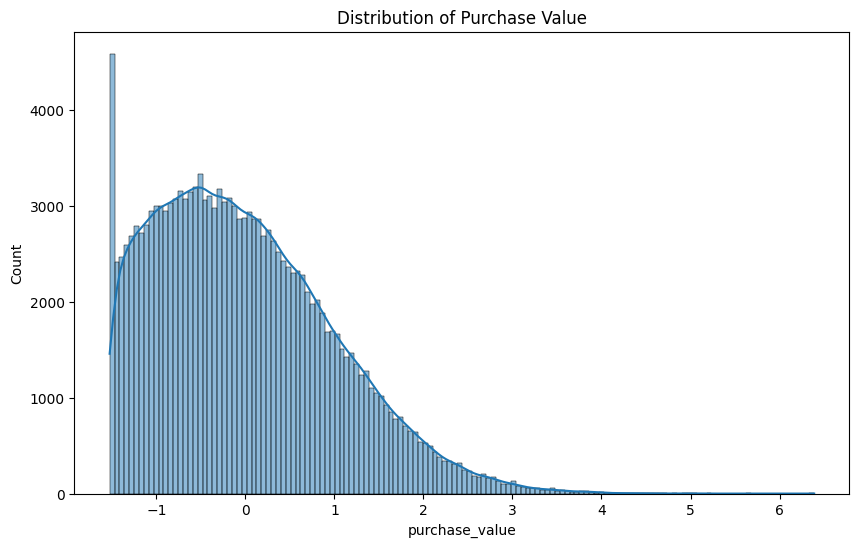

In [ ]:
# Univariate analysis for fraud_data
plt.figure(figsize=(10, 6))
sns.histplot(dp_fraud.data['purchase_value'], kde=True)
plt.title('Distribution of Purchase Value')
plt.show()

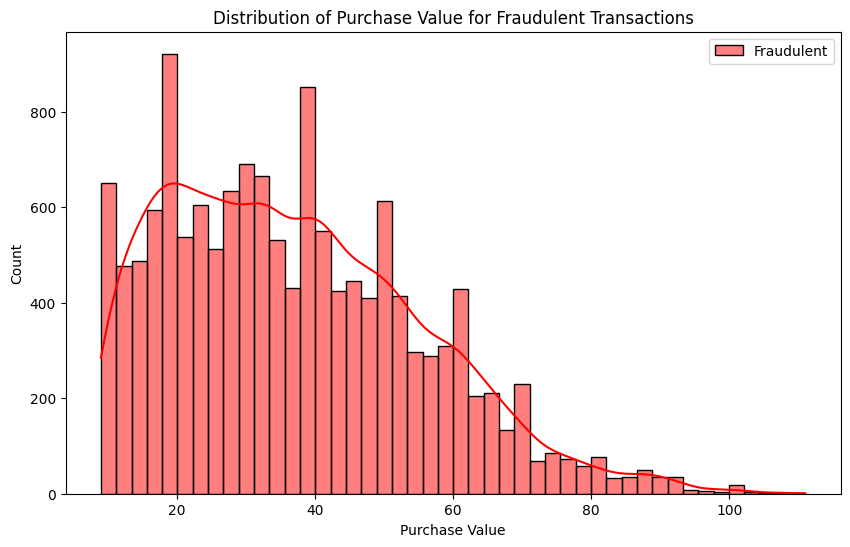

In [ ]:
# Univariate analysis for fraudulent transactions
plt.figure(figsize=(10, 6))
sns.histplot(fraud_data[fraud_data['class'] == 1]['purchase_value'], kde=True, color='red', label='Fraudulent')
plt.title('Distribution of Purchase Value for Fraudulent Transactions')
plt.xlabel('Purchase Value')
plt.ylabel('Count')
plt.legend()
plt.show()

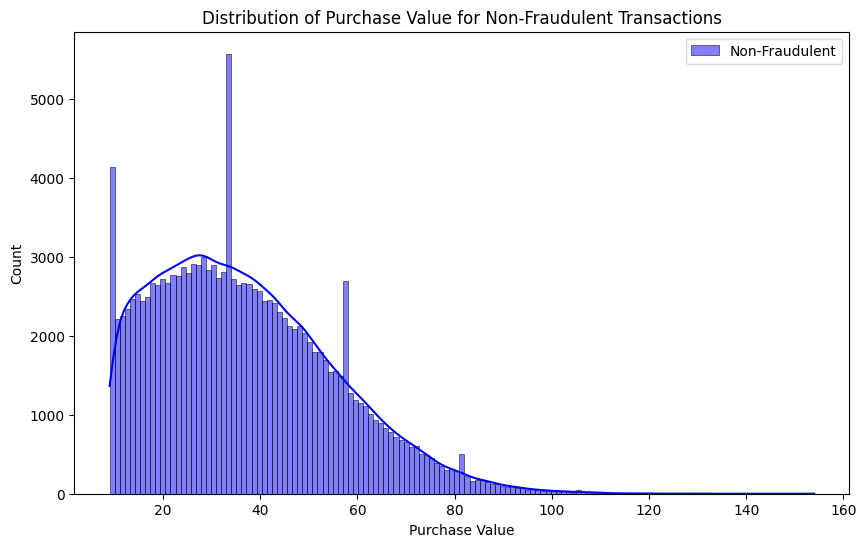

In [ ]:
# Univariate analysis for non-fraudulent transactions
plt.figure(figsize=(10, 6))
sns.histplot(fraud_data[fraud_data['class'] == 0]['purchase_value'], kde=True, color='blue', label='Non-Fraudulent')
plt.title('Distribution of Purchase Value for Non-Fraudulent Transactions')
plt.xlabel('Purchase Value')
plt.ylabel('Count')
plt.legend()
plt.show()

### Bivariate analysis

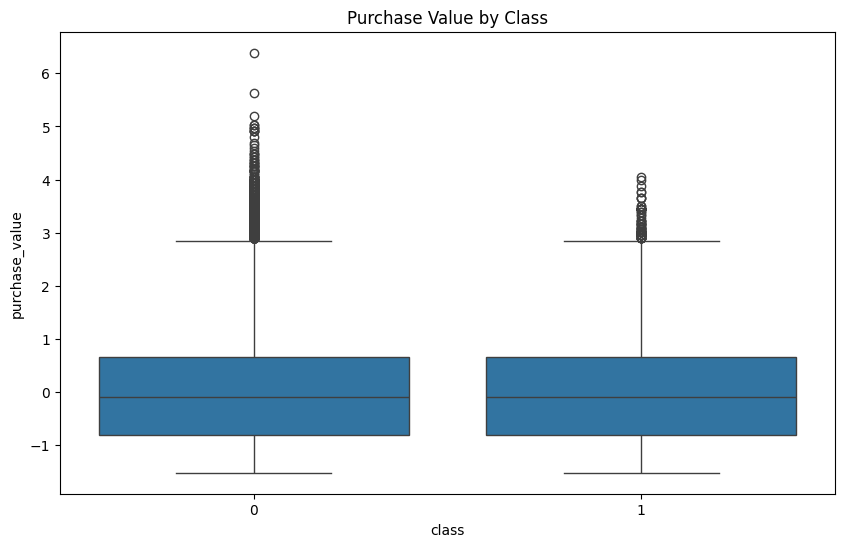

In [ ]:
# Bivariate analysis for fraud_data
plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='purchase_value', data=dp_fraud.data)
plt.title('Purchase Value by Class')
plt.show()

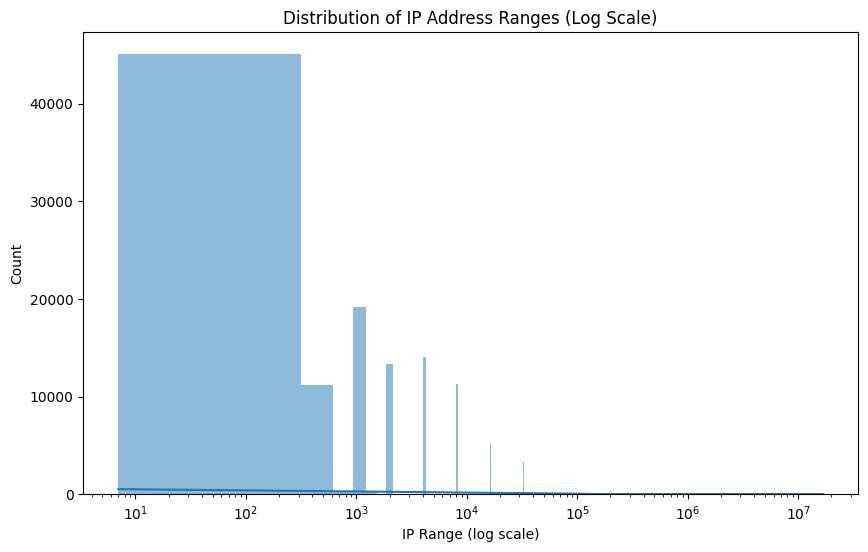

In [ ]:
# Visualize IP address ranges distribution with log scale
plt.figure(figsize=(10, 6))
sns.histplot(ip_address_data['ip_range'], kde=True)
plt.xscale('log')
plt.title('Distribution of IP Address Ranges (Log Scale)')
plt.xlabel('IP Range (log scale)')
plt.ylabel('Count')
plt.show()

C:\Users\matiwos.desalegn\AppData\Local\Temp\ipykernel_26456\1259580732.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_countries.index, x=top_countries.values, palette='viridis')


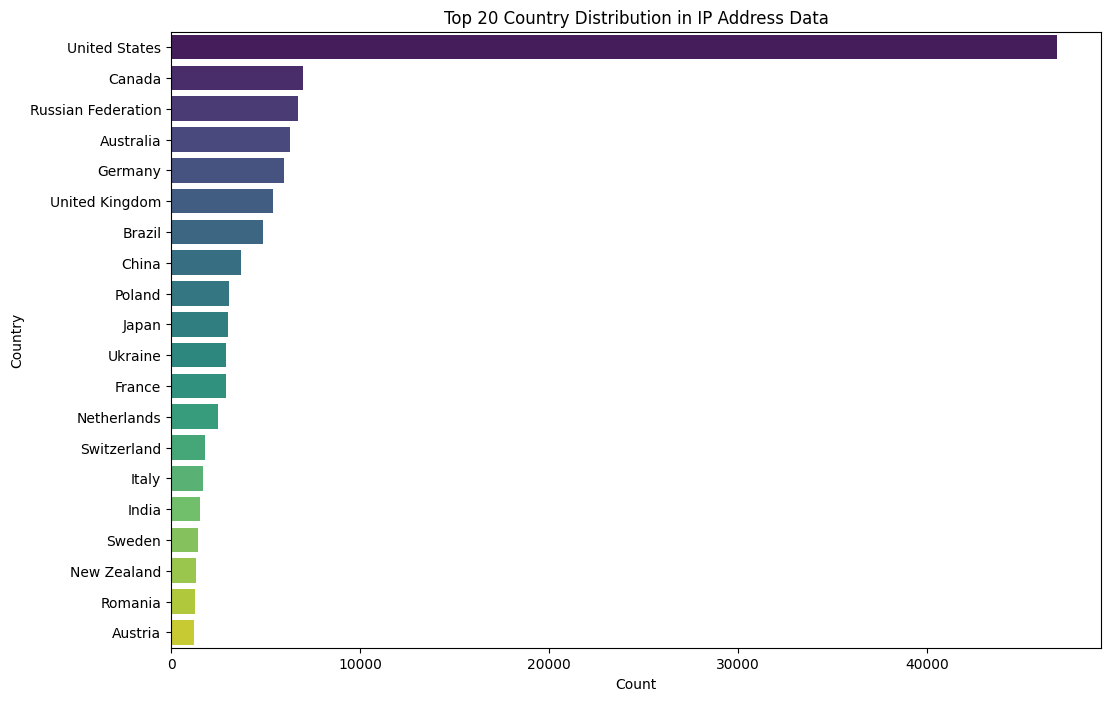

In [ ]:
# Check and visualize top N countries by count
top_n_countries = 20
top_countries = ip_address_data['country'].value_counts().head(top_n_countries)
plt.figure(figsize=(12, 8))
sns.barplot(y=top_countries.index, x=top_countries.values, palette='viridis')
plt.title(f'Top {top_n_countries} Country Distribution in IP Address Data')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()